In [0]:
from google.colab import files

uploads = files.upload()

In [0]:
!unzip fifa-world-cup.zip

Archive:  fifa-world-cup.zip
  inflating: WorldCupMatches.csv     
  inflating: WorldCups.csv           
  inflating: WorldCupPlayers.csv     


In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.externals import joblib

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['datalab', '.local', 'WorldCupPlayers.csv', 'WorldCups.csv', '.forever', '.cache', 'WorldCupMatches.csv', '.config', 'fifa-world-cup.zip', '.ipython']


In [2]:
matches = pd.read_csv('./WorldCupMatches.csv')
players = pd.read_csv('./WorldCupPlayers.csv')
cups = pd.read_csv('./WorldCups.csv')
matches = matches.dropna()
players = players.dropna()
cups = cups.dropna()

cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


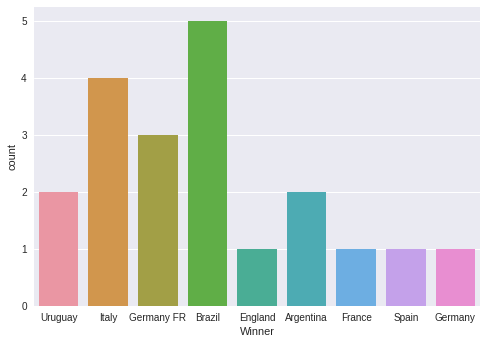

In [76]:
#number of WC championship ploting
sns.countplot(cups['Winner'])

In [26]:
#replace German DR and Germany FR by Germany
#replace Soviet Union by Russia
def replace_name(df):
    if(df['Home Team Name'] in ['German DR', 'Germany FR']):
        df['Home Team Name'] = 'Germany'
    elif(df['Home Team Name'] == 'Soviet Union'):
        df['Home Team Name'] = 'Russia'
    
    if(df['Away Team Name'] in ['German DR', 'Germany FR']):
        df['Away Team Name'] = 'Germany'
    elif(df['Away Team Name'] == 'Soviet Union'):
        df['Away Team Name'] = 'Russia'
    return df
    
matches = matches.apply(replace_name, axis='columns')

matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [27]:
#create a dictionary of football team
team_name = {}
index = 0
for idx, row in matches.iterrows():
    name = row['Home Team Name']
    if(name not in team_name.keys()):
        team_name[name] = index
        index += 1
    name = row['Away Team Name']
    if(name not in team_name.keys()):
        team_name[name] = index
        index += 1
        
team_name

{'Algeria': 49,
 'Angola': 72,
 'Argentina': 8,
 'Australia': 41,
 'Austria': 13,
 'Belgium': 3,
 'Bolivia': 10,
 'Brazil': 5,
 'Bulgaria': 35,
 'Cameroon': 47,
 'Canada': 52,
 'Chile': 9,
 'China PR': 68,
 'Colombia': 34,
 'Costa Rica': 56,
 'Croatia': 64,
 'Cuba': 24,
 'Czech Republic': 73,
 'Czechoslovakia': 22,
 "C�te d'Ivoire": 70,
 'Denmark': 54,
 'Dutch East Indies': 23,
 'Ecuador': 67,
 'Egypt': 15,
 'El Salvador': 40,
 'England': 27,
 'France': 0,
 'Germany': 19,
 'Ghana': 74,
 'Greece': 59,
 'Haiti': 43,
 'Honduras': 50,
 'Hungary': 14,
 'IR Iran': 45,
 'Iran': 46,
 'Iraq': 53,
 'Israel': 38,
 'Italy': 21,
 'Jamaica': 63,
 'Japan': 62,
 'Korea DPR': 36,
 'Korea Republic': 30,
 'Kuwait': 51,
 'Mexico': 1,
 'Morocco': 39,
 'Netherlands': 17,
 'New Zealand': 48,
 'Nigeria': 60,
 'Northern Ireland': 33,
 'Norway': 25,
 'Paraguay': 11,
 'Peru': 7,
 'Poland': 26,
 'Portugal': 37,
 'Romania': 6,
 'Russia': 31,
 'Saudi Arabia': 58,
 'Scotland': 28,
 'Senegal': 65,
 'Serbia': 77,
 'Sl

In [49]:
#drop unecessary columns
dropped_matches = matches.drop(['Datetime', 'Stadium', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID','Win conditions',
             'Home Team Initials', 'Away Team Initials', 'Half-time Home Goals', 'Half-time Away Goals',
             'Attendance', 'City', 'MatchID', 'Stage'], 1)


In [50]:
#Make a serie counting the number of time each team became WC champion
championships = cups['Winner'].map(lambda p: 'Germany' if p=='Germany FR' else p).value_counts()
championships

Brazil       5
Italy        4
Germany      4
Argentina    2
Uruguay      2
Spain        1
England      1
France       1
Name: Winner, dtype: int64

In [51]:
#append 'Home Team Championships' and 'Away Team Championships': Number of times being the champion of WC
dropped_matches['Home Team Championship'] = 0
dropped_matches['Away Team Championship'] = 0

def count_championship(df):
  if(championships.get(df['Home Team Name']) != None):
    df['Home Team Championship'] = championships.get(df['Home Team Name'])
  if(championships.get(df['Away Team Name']) != None):
    df['Away Team Championship'] = championships.get(df['Away Team Name'])
  return df


dropped_matches = dropped_matches.apply(count_championship, axis='columns')

dropped_matches

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Championship,Away Team Championship
0,1930.0,France,4.0,1.0,Mexico,1,0
1,1930.0,USA,3.0,0.0,Belgium,0,0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,0,5
3,1930.0,Romania,3.0,1.0,Peru,0,0
4,1930.0,Argentina,1.0,0.0,France,2,1
5,1930.0,Chile,3.0,0.0,Mexico,0,0
6,1930.0,Yugoslavia,4.0,0.0,Bolivia,0,0
7,1930.0,USA,3.0,0.0,Paraguay,0,0
8,1930.0,Uruguay,1.0,0.0,Peru,2,0
9,1930.0,Chile,1.0,0.0,France,0,1


In [52]:
#find who won: Home win: 1, Away win: 2, Draw: 0
dropped_matches['Winner'] = '-'

def find_winner(df):
    if(int(df['Home Team Goals']) == int(df['Away Team Goals'])):
        df['Winner'] = 0
    elif(int(df['Home Team Goals']) > int(df['Away Team Goals'])):
        df['Winner'] = 1
    else:
        df['Winner'] = 2
    return df

dropped_matches = dropped_matches.apply(find_winner, axis='columns')

dropped_matches

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Championship,Away Team Championship,Winner
0,1930.0,France,4.0,1.0,Mexico,1,0,1
1,1930.0,USA,3.0,0.0,Belgium,0,0,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,0,5,1
3,1930.0,Romania,3.0,1.0,Peru,0,0,1
4,1930.0,Argentina,1.0,0.0,France,2,1,1
5,1930.0,Chile,3.0,0.0,Mexico,0,0,1
6,1930.0,Yugoslavia,4.0,0.0,Bolivia,0,0,1
7,1930.0,USA,3.0,0.0,Paraguay,0,0,1
8,1930.0,Uruguay,1.0,0.0,Peru,2,0,1
9,1930.0,Chile,1.0,0.0,France,0,1,1


In [54]:
#replace team name by id in team_name dictionary

def replace_team_name_by_id(df):
    df['Home Team Name'] = team_name[df['Home Team Name']]
    df['Away Team Name'] = team_name[df['Away Team Name']]
    #df['Winner'] = team_name[df['Winner']]
    return df

teamid_matches = dropped_matches.apply(replace_team_name_by_id, axis='columns')
teamid_matches

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Championship,Away Team Championship,Winner
0,1930.0,0,4.0,1.0,1,1,0,1
1,1930.0,2,3.0,0.0,3,0,0,1
2,1930.0,4,2.0,1.0,5,0,5,1
3,1930.0,6,3.0,1.0,7,0,0,1
4,1930.0,8,1.0,0.0,0,2,1,1
5,1930.0,9,3.0,0.0,1,0,0,1
6,1930.0,4,4.0,0.0,10,0,0,1
7,1930.0,2,3.0,0.0,11,0,0,1
8,1930.0,12,1.0,0.0,7,2,0,1
9,1930.0,9,1.0,0.0,0,0,1,1


In [55]:
#drop unecessary columns
teamid_matches = teamid_matches.drop(['Year', 'Home Team Goals', 'Away Team Goals'], 1)

teamid_matches

,Home Team Name,Away Team Name,Home Team Championship,Away Team Championship,Winner
0,0,1,1,0,1
1,2,3,0,0,1
2,4,5,0,5,1
3,6,7,0,0,1
4,8,0,2,1,1
5,9,1,0,0,1
6,4,10,0,0,1
7,2,11,0,0,1
8,12,7,2,0,1
9,9,0,0,1,1


In [57]:
#TRAINING STEPS


#create numpy array
X = teamid_matches.loc[:,['Home Team Name', 'Away Team Name', 'Home Team Championship','Away Team Championship']]
X = np.array(X).astype('float64')

#append data: simply exchange 'home team name' with 'away team name', 'home team championship' with 'away team championship', and replace the result
_X = X.copy()

_X[:,0] = X[:,1]
_X[:,1] = X[:,0]
_X[:,2] = X[:,3]
_X[:,3] = X[:,2]

y = dropped_matches.loc[:,['Winner']]
y = np.array(y).astype('int')
y = np.reshape(y,(1,850))
y = y[0]


_y = y.copy()

for i in range(len(_y)):
  if(_y[i]==1):
    _y[i] = 2
  elif(_y[i] ==2):
    _y[i] = 1
    
#===========
    
X = np.concatenate((X,_X), axis= 0)

y = np.concatenate((y,_y))



In [71]:
#shuffle and split test, train
X,y = shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(y_train)


[0 0 0 ... 1 1 0]


In [72]:
#train by svm
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
param_grid = {'C': [1e3],
              'gamma': [0.0001] }
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm_model.fit(X, y)
#print("Best estimator found by grid search:")
#print(svm_model.best_estimator_)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
print("Predicting on the test set")
#t0 = time()
y_pred = svm_model.predict(X_test)
#print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, labels=range(3)))

Predicting on the test set
             precision    recall  f1-score   support

          0       0.61      0.74      0.67        97
          1       0.79      0.74      0.77       167
          2       0.81      0.75      0.78       161

avg / total       0.76      0.75      0.75       425

[[ 72  14  11]
 [ 26 124  17]
 [ 21  19 121]]


In [117]:
def prediction(team1, team2):
  id1 = team_name[team1]
  id2 = team_name[team2]
  championship1 = championships.get(team1) if championships.get(team1) != None else 0
  championship2 = championships.get(team2) if championships.get(team2) != None else 0

  x = np.array([id1, id2, championship1, championship2]).astype('float64')
  x = np.reshape(x, (1,-1))
  _y = svm_model.predict_proba(x)[0]

  text = ('Chance for '+team1+' to win '+team2+' is {}\nChance for '+team2+' to win '+team1+' is {}\nChance for '+team1+' and '+team2+' draw is {}').format(_y[1]*100,_y[2]*100,_y[0]*100)
  return _y[0], text

In [118]:
#predict match between France and Uruguay
prob1, text1 = prediction('France', 'Uruguay')
print(text1)

Chance for France to win Uruguay is 25.10306788225706
Chance for Uruguay to win France is 46.1340607330522
Chance for France and Uruguay draw is 28.76287138469073


In [119]:
#predict match between Brazil and Belgium
prob2, text2 = prediction('Brazil','Belgium')
print(text2)

Chance for Brazil to win Belgium is 52.802808756870654
Chance for Belgium to win Brazil is 21.96151511414537
Chance for Brazil and Belgium draw is 25.235676128983986


In [121]:
#predict matches between England and Sweeden
prob3, text3 = prediction('England','Sweden')
print(text3)

Chance for England to win Sweden is 47.868701683368165
Chance for Sweden to win England is 22.88277845201174
Chance for England and Sweden draw is 29.2485198646201
